<a href="https://colab.research.google.com/gist/githubdcw/2f71648b4e18de2edb662de2c71d118b/example_straight_line_density_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ตัวอย่างการหาน้ำหนักของเส้นลวด

จงหาน้ำหนักของเส้นลวดตรงยาว 2 เมตร หนัก 5 kg/m  
เนื่องจากความหนาแน่นของเส้นลวดมีค่าคงที่เราสามารถเอาความยาวมาคูณกับความหนาแน่น  
จะได้น้ำหนักสุทธิของเส้นลวดคือ $5\times2 = 10$  


จงหาน้ำหนักของเส้นลวดตรงยาว 2 เมตร หนัก $x^2$kg/m เมื่อ $x$ คือตำแหน่งของจุดบนเส้นลวด    
เนื่องจากความหนาแน่นเปลี่ยนแปลงตามตำแหน่งของเส้นลวดดังนั้นเราจะต้องถามว่าเส้นลวดวางอย่างไร  
เช่นถ้าเส้นลวดวางอยู่บนแกน $y$ แปลว่า $x=0$ ทุกๆจุดบนบนเส้นลวดจะได้ว่าน้ำหนักของเส้นลวดนี้จะเท่ากับศูนย์  
แต่ถ้าเส้นลวดวางอยู่บนแกน $x$ โดยเริ่มจาก $x=0$ ถึง $x=2$ เราจะเห็นว่าที่ต่ำแหน่งต่างๆบนเส้นลวดมีความหนาแน่นไม่เท่ากัน เราไม่สามารถเอาความหนาแน่นคูณความได้ตรงๆ เพราะถ้าเราทำเช่นนั้นเราจะได้ได้ว่าน้ำหนักของเส้นลวดจะมีค่าเท่ากับ $x^2 \times 2 = 2 x^2$kg ซึ่งเราไม่รู้ว่าค่านี้หมายความว่าอย่างไร ไม่สามารถรู้สึกได้ว่ามันหนักเท่าไหร่ ค่าที่ได้ต้องเป็นตัวเลขไม่ใช่ค่าที่ยังมีตัวแปร $x$ อยู่     


เราสามารถประมาณน้ำหนักได้โดยการแบ่งเส้นลวดเป็น $N$ ส่วนเท่าๆกัน โดยสมมุติว่าแต่ละส่วนมีความหนาแน่นคงที่เท่ากับค่าที่จุดกึ่งกลางของแต่ละส่วนเช่น  
- ถ้าให้ $N=1$ เราจะได้ว่า 
  - ความหน่าแน่นของชิ่นที่ 1 เท่ากับ 1 kg/m    
  - น้ำหนักเท่ากับ $1^2 \times 2 =2$kg/m   
- ถ้าให้ $N=2$ เราจะได้ว่า
  - ความหน่าแน่นของชิ่นที่ 1 เท่ากับ 0.5 kg/m   
  - ความหน่าแน่นของชิ่นที่ 2 เท่ากับ 1.5 kg/m   
  - น้ำหนักเท่ากับ $0.5^2 \times 1 + 1.5^2 \times 1$kg/m   
- ถ้าให้ $N=4$ เราจะได้ว่า 
  - ความหน่าแน่นของชิ่นที่ 1 เท่ากับ 0.25 kg/m   
  - ความหน่าแน่นของชิ่นที่ 2 เท่ากับ 0.75 kg/m  
  - ความหน่าแน่นของชิ่นที่ 3 เท่ากับ 1.25 kg/m  
  - ความหน่าแน่นของชิ่นที่ 4 เท่ากับ 1.75 kg/m   
  - น้ำหนักเท่ากับ $0.25^2 \times 0.5 + 0.75^2 \times 0.5+1.25^2 \times 0.5 + 1.75^2 \times 0.5$kg  
หรือเราสามารถเขียนเป็นสมการได้ดังนี้ $W \approx \sum_{i=1}^N x_i^2 \Delta x_i$  
เราสามารถเขียนโปรแกรมได้ตาม Python Code ด้านล่าง


In [10]:
import numpy as np
N = 4
L = 2
del_x = L/N 
x = del_x*np.array(range(N))+del_x/2
print(x)
weight = 0
for ii in range(N):
  weight = weight+(x[ii]**2)*del_x
print(weight)

[0.25 0.75 1.25 1.75]
2.625


ทดลองปรับค่า N เป็นค่าต่างๆ

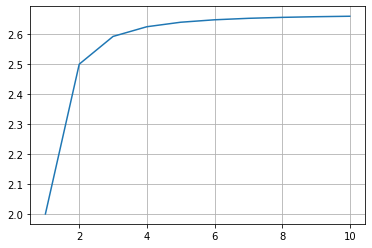

In [11]:
import numpy as np
import matplotlib.pyplot as plt
N = 4
L = 2
w = []
for N in range(1,11):
  del_x = L/N 
  x = del_x*np.array(range(N))+del_x/2
  # print(x)
  weight = 0
  for ii in range(N):
    weight = weight+(x[ii]**2)*del_x
  w.append(weight)
plt.plot(range(1,11),w)
plt.grid()
plt.show()

ถ้าเราให้ N มากขึ้นค่าน้ำหนักที่ได้จะลู่เข้าค่าจริง ถ้าเราต้องการค่าจริงเราต้องแบ่งเป็น $\infty$ ส่วน เราจะได้สมการ $W = \sum_{i=1}^\infty x_i^2 \Delta x_i$  
เมื่อ $\Delta x \rightarrow 0$ เราจะได้ว่า $\sum_{i=1}^\infty \rightarrow \int$ และ $\Delta x \rightarrow d x$ ดังนั้น $W = \int_{i=1}^{i= \infty} x^2 d x$ และ $i=1$ คือ $x=0$ และ $i=\infty$ คือ $x=2$ ดังนั้นเราจะได้สมการดังนี้     
$$
W = \int_{x=0}^{x= 2} x^2 d x 
$$
$$
W =  \frac{x^3}{3}|_{x=0}^{x= 2} 
$$
$$
W =  \frac{2^3}{3}=\frac{8}{3} = 2.67 
$$
จะเห็นว่าถ้าเราประมาณโดยแบ่งเป็น 4 ส่วนเราได้ค่าเท่ากับ 2.625 ซึ่งมีความผิดพลาดเท่ากับ $100 \frac{2.67-2.625}{2.67}=1.69$%

In [12]:
100*(2.67-2.625)/(2.67)

1.6853932584269637